<a href="https://colab.research.google.com/github/ruiguo-bio/MusIAC/blob/main/MusIAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install the runtime

In [1]:
!sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable -y
!sudo apt update
!apt install musescore3 fluidsynth
!pip install pyFluidSynth
!pip install pretty_midi
!pip install einops
!pip install coloredlogs
!pip install pyyaml --upgrade
!pip install music21 --upgrade

Repository: 'deb https://ppa.launchpadcontent.net/mscore-ubuntu/mscore3-stable/ubuntu/ jammy main'
Description:
~~~~~~~~~ MUSESCORE 3 RELEASES FOR UBUNTU 18.04 AND LATER ~~~~~~~~~
Note that Canonical doesn’t allow new builds for releases marked obsolete
(any nōn-LTS predating the previous LTS (currently 24.04 “noble”), and any LTS
older than 7 years, currently anything before 14.04 “trusty”). The packages
for those older releases here can no longer be updated but still work, within
limitations. Best to upgrade to a supported release of the operating system!

INSTALLING: (run these commands from the terminal)
  sudo add-apt-repository ppa:mscore-ubuntu/mscore3-stable
  sudo apt-get update
  sudo apt-get install musescore3

DO *NOT* USE THESE PPAs on Debian, only on Ubuntu!

‣‣‣ These packages are NOT suitable for ”KDE neon 18.04 (bionic)”!
‣ Use https://build.opensuse.org/project/show/home:mirabile:mscore instead.
⚠ KDE neon 18.04 was discontinued so those packages can no longer be upda

In [6]:
# Install gdown once
!pip install -q gdown

import gdown, os

def download_file(file_id: str, output: str, min_size: int, max_retries: int = 5):
    """
    Download a Google Drive file with retries until min_size is satisfied.

    Args:
        file_id: Google Drive file ID (the long string in the URL).
        output: Local filename to save.
        min_size: Minimum acceptable file size in bytes.
        max_retries: Retry attempts if download is too small.
    """
    url = f"https://drive.google.com/uc?id={file_id}"
    trial = 0
    while trial < max_retries:
        gdown.download(url, output, quiet=False)
        if os.path.exists(output) and os.path.getsize(output) >= min_size:
            print(f"✅ Downloaded {output} ({os.path.getsize(output)} bytes)")
            return
        else:
            print(f"⚠️ Retry {trial+1}: file too small")
            trial += 1
    print(f"❌ Failed to download {output} after {max_retries} tries.")





In [2]:
!git clone https://github.com/ruiguo-bio/MusIC.git

Cloning into 'MusIC'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 20 (delta 8), reused 12 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 3.50 MiB | 14.12 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [3]:
cd MusIC


/content/MusIC


In [4]:
!mkdir config
!mkdir config/files

In [7]:

download_file("1668tL7TNJfwkcN8DDSsvThFeqGb6NrML", "config.yaml", min_size=500)
download_file("18VYsklaI8NVnQ1rG1oeVuzomC6CcYgO-", "checkpoint_9", min_size=362500000)
download_file("13iT3FeSytDVDLAbLYwUUVjbYJWmZklvX", "batches", min_size=290000000)
download_file("1n91ybLbTgkVlZjPtDbkPpHEp6tFyx7yh", "batch_names", min_size=400000)
download_file("1ShoMwCLQ3ghvuR7uQaeWD-gHOIMNxmcr", "font.sf2", min_size=140000000)

Downloading...
From: https://drive.google.com/uc?id=1668tL7TNJfwkcN8DDSsvThFeqGb6NrML
To: /content/MusIC/config.yaml
100%|██████████| 567/567 [00:00<00:00, 2.11MB/s]


✅ Downloaded config.yaml (567 bytes)


Downloading...
From (original): https://drive.google.com/uc?id=18VYsklaI8NVnQ1rG1oeVuzomC6CcYgO-
From (redirected): https://drive.google.com/uc?id=18VYsklaI8NVnQ1rG1oeVuzomC6CcYgO-&confirm=t&uuid=ce0d5b3c-db22-4d06-9edb-ecf5f1b130db
To: /content/MusIC/checkpoint_9
100%|██████████| 363M/363M [00:14<00:00, 24.6MB/s]


✅ Downloaded checkpoint_9 (362599621 bytes)


Downloading...
From (original): https://drive.google.com/uc?id=13iT3FeSytDVDLAbLYwUUVjbYJWmZklvX
From (redirected): https://drive.google.com/uc?id=13iT3FeSytDVDLAbLYwUUVjbYJWmZklvX&confirm=t&uuid=ee57c057-2728-4918-a030-42dbdd1834b3
To: /content/MusIC/batches
100%|██████████| 296M/296M [00:06<00:00, 45.8MB/s]


✅ Downloaded batches (295840829 bytes)


Downloading...
From: https://drive.google.com/uc?id=1n91ybLbTgkVlZjPtDbkPpHEp6tFyx7yh
To: /content/MusIC/batch_names
100%|██████████| 489k/489k [00:00<00:00, 106MB/s]


✅ Downloaded batch_names (488899 bytes)


Downloading...
From (original): https://drive.google.com/uc?id=1ShoMwCLQ3ghvuR7uQaeWD-gHOIMNxmcr
From (redirected): https://drive.google.com/uc?id=1ShoMwCLQ3ghvuR7uQaeWD-gHOIMNxmcr&confirm=t&uuid=888e9f9e-5106-4598-9d8e-f1e861d7de23
To: /content/MusIC/font.sf2
100%|██████████| 148M/148M [00:04<00:00, 36.0MB/s]

✅ Downloaded font.sf2 (148398306 bytes)


In [8]:

!mv checkpoint_9 config/files/
!mv config.yaml config/files/


In [9]:

from einops import rearrange

import pickle
import torch
import os

import argparse
import copy
import sys
import pretty_midi



import re
import yaml
import itertools

from vocab_colab import *


from model import ScoreTransformer

import tension_calculation

import IPython.display

import matplotlib.pyplot as plt

from google.colab import files

import music21

In [10]:
def show_score(pm):
    pm.write('./temp.mid')
    stream = music21.converter.parse('./temp.mid')
    stream.show()


def setup_musescore(musescore_path=None):
    if not is_ipython(): return

    import platform
    from music21 import environment
    from pathlib import Path

    system = platform.system()
    if system == 'Linux':
        import os
        os.environ['QT_QPA_PLATFORM'] = 'offscreen'  # https://musescore.org/en/node/29041

    existing_path = environment.get('musicxmlPath')
    if existing_path: return
    if musescore_path is None:
        if system == 'Darwin':
            app_paths = list(Path('/Applications').glob('MuseScore *.app'))
            if len(app_paths): musescore_path = app_paths[-1] / 'Contents/MacOS/mscore3'
        elif system == 'Linux':
            musescore_path = '/usr/bin/mscore3'

    if musescore_path is None or not Path(musescore_path).exists():
        print(
            'Warning: Could not find musescore installation. Please install musescore (see README) and/or update music21 environment paths')
    else:
        environment.set('musicxmlPath', musescore_path)
        environment.set('musescoreDirectPNGPath', musescore_path)


def is_ipython():
    try:
        get_ipython
    except:
        return False
    return True


def is_colab():
    try:
        import google.colab
    except:
        return False
    return True

In [11]:
setup_musescore()

In [12]:


def remi_2midi(events):

    if events[1][0] == 't':
        # print(events)
        tempo_category = int(events[1][2])
        if tempo_category == len(tempo_bins) - 1:
            tempo = tempo_bins[tempo_category]
        else:
            tempo = (tempo_bins[tempo_category] + tempo_bins[tempo_category + 1]) / 2
    else:
        tempo = float(events[1])
    pm_new = pretty_midi.PrettyMIDI(initial_tempo=tempo)

    numerator = int(events[0].split('/')[0])
    denominator = int(events[0].split('/')[1])
    time_signature = pretty_midi.TimeSignature(numerator, denominator, 0)
    pm_new.time_signature_changes = [time_signature]

    r = re.compile('track_\d')

    track_num = list(filter(r.match, events))

    r = re.compile('i_\d')

    programs = list(filter(r.match, events))

    for track in programs:
        track = pretty_midi.Instrument(program=int(track.split('_')[-1]))
        pm_new.instruments.append(track)

    # add a fake note for duration dict calculation
    pm_new.instruments[0].notes.append(pretty_midi.Note(
        velocity=100, pitch=30, start=0, end=10))
    beats = pm_new.get_beats()
    pm_new.instruments[0].notes.pop()
    duration_name_to_time, duration_time_to_name, duration_times, bar_duration = get_note_duration_dict(
        beats[1] - beats[0], (time_signature.numerator, time_signature.denominator))
    sixteenth_duration = duration_name_to_time['sixteenth']
    curr_time = 0
    bar_num = 0
    bar_start_time = 0
    pitch_list = []
    for idx, event in enumerate(events):
        # print(idx,event)
        if event == 'bar':
            curr_time = bar_num * bar_duration
            bar_start_time = curr_time
            bar_num += 1
        if event in track_num:
            curr_time = bar_start_time
            current_track = event

        if event in step_token:
            curr_time = bar_start_time + int(event[2:]) * sixteenth_duration
        if event in pitch_tokens:
            pitch_list.append(int(event[2:]))

        if event in duration_single:
            end_time = curr_time + (int(event[2:])) * sixteenth_duration
            start_time = curr_time
            for pitch in pitch_list:
                if current_track == 'track_0':
                    vel = V0
                elif current_track == 'track_1':
                    vel = V1
                else:
                    vel = V2
                note = pretty_midi.Note(velocity=vel, pitch=pitch,
                                        start=start_time, end=end_time)
                pm_new.instruments[int(current_track[6])].notes.append(note)
            pitch_list = []

    return pm_new





def cal_tension(pm,key_names=None):


    result = tension_calculation.extract_notes(pm, 3)

    if result:

        pm, piano_roll, sixteenth_time, beat_time, down_beat_time, beat_indices, down_beat_indices = result
    else:
        return None

    if key_names:
        key_name = [key_names]
    else:
        key_name = tension_calculation.all_key_names



    result = tension_calculation.cal_tension(
        piano_roll, beat_time, beat_indices, down_beat_time,
        down_beat_indices, -1, key_name,sixteenth_time,pm)

    if result:
        tensiles, diameters, key_name,\
        changed_key_name, key_change_beat = result
    else:
        return None

    tensile_category = to_category(tensiles,tensile_bins)
    diameter_category = to_category(diameters, diameter_bins)

    # print(f'key is {key_name}')

    return tensile_category, diameter_category,key_name


def note_density(track_events, track_length):
    densities = []
    tracks = track_events.keys()
    # print(tracks)
    for track_name in tracks:
        # print(track_name)
        note_num = 0
        this_track_events = track_events[track_name]
        # print(this_track_events)
        for track_event in this_track_events:
            for event_index in range(len(track_event) - 1):
                if track_event[event_index][0] == 'p' and track_event[event_index + 1][0] != 'p':
                    note_num += 1
        #         print(note_num / track_length)
        densities.append(note_num / track_length)
    return densities


def occupation_polyphony_rate(pm):
    occupation_rate = []
    polyphony_rate = []
    beats = pm.get_beats()
    fs = 4 / (beats[1] - beats[0])

    for instrument in pm.instruments:
        piano_roll = instrument.get_piano_roll(fs=fs)
        if piano_roll.shape[1] == 0:
            occupation_rate.append(0)
        else:
            occupation_rate.append(np.count_nonzero(np.any(piano_roll, 0)) / piano_roll.shape[1])
        if np.count_nonzero(np.any(piano_roll, 0)) == 0:
            polyphony_rate.append(0)
        else:
            polyphony_rate.append(
                np.count_nonzero(np.count_nonzero(piano_roll, 0) > 1) / np.count_nonzero(np.any(piano_roll, 0)))

    return occupation_rate, polyphony_rate


def to_category(array, bins):
    result = []
    for item in array:
        result.append(int(np.where((item - bins) >= 0)[0][-1]))
    return result


def pitch_register(track_events):
    registers = []
    tracks = track_events.keys()
    # print(tracks)
    for track_name in tracks:
        # print(track_name)
        register = []
        this_track_events = track_events[track_name]
        # print(this_track_events)
        for track_event in this_track_events:
            for event in track_event:
                if event[0] == 'p':
                    register.append(int(event[2:]))
        #         print(note_num / track_length)
        # print(np.mean(register))
        if len(register) == 0:
            registers.append(0)
        else:
            registers.append(int((np.mean(register) - 21) / 11))
    return registers


def cal_track_control(file_events,pm):


    r = re.compile('i_\d')

    track_program = list(filter(r.match, file_events))
    num_of_tracks = len(track_program)



    file_events = np.array(file_events)

    #     print(f'number of bars is {len(bar_pos)}')
    #     print(f'time signature is {file_event[1]}')
    bar_length = int(file_events[0][0])
    bar_pos = np.where(file_events == 'bar')[0]
    if bar_length != 6:
        bar_length = bar_length * 4 * len(bar_pos)
    else:
        bar_length = bar_length / 2 * 4 * len(bar_pos)
    #     print(f'bar length is {bar_length}')

    track_events = {}

    for i in range(min(num_of_tracks,3)):
        track_events[f'track_{i}'] = []
    track_names = list(track_events.keys())
    if len(track_names) == 0:
        return None

    for bar_index in range(len(bar_pos) - 1):
        bar = bar_pos[bar_index]
        next_bar = bar_pos[bar_index + 1]
        bar_events = file_events[bar:next_bar]
        #         print(bar_events)

        track_pos = []

        for track_name in track_names:
            if len(np.where(track_name == bar_events)[0]) == 0:
                print(bar_events)
                print(f'track name is {track_name}')
                return None
            else:
                track_pos.append(np.where(track_name == bar_events)[0][0])
        #         print(track_pos)
        track_index = 0
        for track_index in range(len(track_names) - 1):
            track_event = bar_events[track_pos[track_index]:track_pos[track_index + 1]]
            track_events[track_names[track_index]].append(track_event)
        #             print(track_event)
        else:
            if len(track_names) != 1:
                track_index += 1
            else:
                track_index = 0

            track_event = bar_events[track_pos[track_index]:]
            #             print(track_event)
            track_events[track_names[track_index]].append(track_event)

    densities = note_density(track_events, bar_length)
    density_category = to_category(densities, control_bins)

    occupation_rate, polyphony_rate = occupation_polyphony_rate(pm)
    occupation_category = to_category(occupation_rate, control_bins)
    polyphony_category = to_category(polyphony_rate, control_bins)


    # density_token = [f'd_{category}' for category in density_category]
    # occupation_token = [f'o_{category}' for category in occupation_category]
    # polyphony_token = [f'y_{category}' for category in polyphony_category]

    track_control_tokens = []
    for i in range(num_of_tracks):
        track_control_tokens.append((density_category[i],occupation_category[i],polyphony_category[i]))

    return track_control_tokens


def nucleus(probs, p):
    probs /= (sum(probs) + 1e-5)
    sorted_probs = np.sort(probs)[::-1]
    sorted_index = np.argsort(probs)[::-1]
    cusum_sorted_probs = np.cumsum(sorted_probs)
    after_threshold = cusum_sorted_probs > p
    if sum(after_threshold) > 0:
        last_index = np.where(after_threshold)[0][0] + 1
        candi_index = sorted_index[:last_index]
    else:
        candi_index = sorted_index[:]
    candi_probs = [probs[i] for i in candi_index]
    candi_probs /= sum(candi_probs)
    word = np.random.choice(candi_index, size=1, p=candi_probs)[0]
    return word

def softmax_with_temperature(logits, temperature):
    probs = np.exp(logits / temperature) / np.sum(np.exp(logits / temperature))
    return probs


def weighted_sampling(probs):
    probs /= sum(probs)
    sorted_probs = np.sort(probs)[::-1]
    sorted_index = np.argsort(probs)[::-1]
    word = np.random.choice(sorted_index, size=1, p=sorted_probs)[0]
    return word



def sampling_step_single(logit,vocab, p=None, t=1.0,no_pitch=False,no_duration=False,no_step=False):
    logit = logit.squeeze().cpu().numpy()
    if no_pitch:

        logit = np.array([-100 if i in vocab.pitch_indices else logit[i] for i in range(vocab.vocab_size)])

    if no_duration:
        logit = np.array([-100 if i in vocab.duration_only_indices else logit[i] for i in range(vocab.vocab_size)])

    if no_step:
        logit = np.array([-100 if i in vocab.step_indices else logit[i] for i in range(vocab.vocab_size)])


    logit = np.array([-100 if i in vocab.program_indices + vocab.structure_indices + vocab.time_signature_indices + vocab.tempo_indices  else logit[i] for i in range(vocab.vocab_size)])

    probs = softmax_with_temperature(logits=logit, temperature=t)

    if p is not None:
        cur_word = nucleus(probs, p=p)
    else:
        cur_word = weighted_sampling(probs)
    return cur_word


def gen_nopeek_mask(length):
    """
     Returns the nopeek mask
             Parameters:
                     length (int): Number of tokens in each sentence in the target batch
             Returns:
                     mask (arr): tgt_mask, looks like [[0., -inf, -inf],
                                                      [0., 0., -inf],
                                                      [0., 0., 0.]]
     """
    mask = rearrange(torch.triu(torch.ones(length, length)) == 1, 'h w -> w h')
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))

    return mask


def model_generate(model, src, tgt,device,return_weights=False):

    src = src.clone().detach().unsqueeze(0).long().to(device)
    tgt = torch.tensor(tgt).unsqueeze(0).to(device)
    tgt_mask = gen_nopeek_mask(tgt.shape[1])
    tgt_mask = tgt_mask.clone().detach().unsqueeze(0).to(device)


    output,weights = model.forward(src, tgt, src_key_padding_mask=None, tgt_key_padding_mask=None, memory_key_padding_mask=None,
                           tgt_mask=tgt_mask)
    if return_weights:
        return output.squeeze(0).to('cpu'), weights.squeeze(0).to('cpu')
    else:
        return output.squeeze(0).to('cpu')

# mask_tracks:0,1,2
# mask_bars:[4,5,6,7]
def mask_bar_and_track(event,vocab,mode,mask_tracks=0,mask_bars=[8]):

    mask_mode = mode
    tokens = []

    decoder_target = []
    masked_indices_pairs = []
    mask_bar_names = []
    mask_track_names = []
    bar_poses = np.where(np.array(event) == 'bar')[0]

    r = re.compile('i_\d')

    track_program = list(filter(r.match, event))
    track_nums = len(track_program)
    track_end_poses = []
    if track_nums == 3:
        track_0_pos = np.where('track_0' == np.array(event))[0]
        track_1_pos = np.where('track_1' == np.array(event))[0]
        track_2_pos = np.where('track_2' == np.array(event))[0]
        for pos in track_2_pos[:-1]:
            track_end_poses.append(bar_poses[np.where(pos < bar_poses)[0][0]])
        else:
            track_end_poses.append(len(event))
        all_track_pos = np.sort(np.concatenate([track_0_pos, track_1_pos, track_2_pos, track_end_poses]))

    elif track_nums == 2:
        #         ratios = track_ratio[1]
        track_0_pos = np.where('track_0' == np.array(event))[0]
        track_1_pos = np.where('track_1' == np.array(event))[0]
        for pos in track_1_pos[:-1]:
            track_end_poses.append(bar_poses[np.where(pos < bar_poses)[0][0]])
        else:
            track_end_poses.append(len(event))
        all_track_pos = np.sort(np.concatenate([track_0_pos, track_1_pos, track_end_poses]))

    else:
        track_0_pos = np.where('track_0' == np.array(event))[0]
        for pos in track_0_pos[:-1]:
            track_end_poses.append(bar_poses[np.where(pos < bar_poses)[0][0]])
        else:
            track_end_poses.append(len(event))
        all_track_pos = np.sort(np.concatenate([track_0_pos, track_end_poses]))

    bar_with_track_poses = []

    for i, pos in enumerate(all_track_pos):
        if i % (track_nums + 1) == 0:
            this_bar_poses = []
            this_bar_pairs = []
            this_bar_poses.append(pos)

        else:
            this_bar_poses.append(pos)
            if i % (track_nums + 1) == track_nums:
                for j in range(len(this_bar_poses) - 1):
                    this_bar_pairs.append((this_bar_poses[j], this_bar_poses[j + 1]))

                bar_with_track_poses.append(this_bar_pairs)


    if mask_mode == 0:

        if len(bar_poses) < mask_bars[-1]:
            return None


        for mask_bar in mask_bars:

            track_mask_poses = mask_tracks

            for track_mask_pos in track_mask_poses:
                mask_track_names.append(track_mask_pos)
                mask_bar_names.append(mask_bar)
                bar_with_track_poses[mask_bar][track_mask_pos]
                masked_indices_pairs.append(bar_with_track_poses[mask_bar][track_mask_pos])
    elif mask_mode == 1:
        # mask whole tracks
        # if track_nums == 1:
        #     return None

        # track_mask_number = np.random.randint(0, track_nums-1)
        if track_nums > mask_tracks[-1]:
            track_mask_poses = mask_tracks
        else:
            return None
        for bar_num, tracks_in_a_bar in enumerate(bar_with_track_poses):
            for track_pos, track_star_end_poses in enumerate(tracks_in_a_bar):
                if track_pos in track_mask_poses:
                    mask_bar_names.append(bar_num)
                    mask_track_names.append(track_pos)
                    masked_indices_pairs.append(track_star_end_poses)

    else:
        # mask whole bars

        bar_mask_poses = mask_bars

        for bar_mask_pos in bar_mask_poses:
            for track_name in range(track_nums):
                mask_bar_names.append(bar_mask_pos)
                mask_track_names.append(track_name)
                masked_indices_pairs.append(bar_with_track_poses[bar_mask_pos][track_name])

    assert len(mask_bar_names) == len(mask_track_names)

    token_events = event.copy()

    for masked_pairs in masked_indices_pairs:
        masked_token = event[masked_pairs[0]:masked_pairs[1]]

        for token in masked_token:
            decoder_target.append(vocab.char2index(token))
        else:
            decoder_target.append(vocab.eos_index)

    for masked_pairs in masked_indices_pairs[::-1]:
        # print(masked_pairs)
        # print(token_events[masked_pairs[0]:masked_pairs[1]])
        for pop_time in range(masked_pairs[1] - masked_pairs[0]):
            token_events.pop(masked_pairs[0])
        token_events.insert(masked_pairs[0], 'm_0')

    for token in token_events:
        tokens.append(vocab.char2index(token))

    tokens = np.array(tokens)
    decoder_target = np.array(decoder_target)

    return tokens, decoder_target, mask_track_names, mask_bar_names





def get_note_duration_dict(beat_duration,curr_time_signature):
    duration_name_to_time = {}
    if curr_time_signature[1] == 4:
        # 4/4, 2/4, 3/4
        quarter_note_duration = beat_duration
        half_note_duration = quarter_note_duration * 2
        eighth_note_duration = quarter_note_duration / 2
        sixteenth_note_duration = quarter_note_duration / 4
        if curr_time_signature[0] >= 4:
            whole_note_duration = 4 * quarter_note_duration
        bar_duration = curr_time_signature[0] * quarter_note_duration

    else:
        # 6/8

        quarter_note_duration = beat_duration / 3 * 2
        half_note_duration = quarter_note_duration * 2
        eighth_note_duration = quarter_note_duration / 2
        sixteenth_note_duration = quarter_note_duration / 4

        bar_duration = curr_time_signature[0] * eighth_note_duration

    duration_name_to_time['half'] = half_note_duration
    duration_name_to_time['quarter'] = quarter_note_duration
    duration_name_to_time['eighth'] = eighth_note_duration
    duration_name_to_time['sixteenth'] = sixteenth_note_duration

    basic_names = duration_name_to_time.keys()
    name_pairs = itertools.combinations(basic_names, 2)
    name_triple = itertools.combinations(basic_names, 3)
    name_quadruple = itertools.combinations(basic_names, 4)

    for name1,name2 in name_pairs:
        duration_name_to_time[name1+'_'+name2] = duration_name_to_time[name1] + duration_name_to_time[name2]

    for name1, name2,name3 in name_triple:
        duration_name_to_time[name1 + '_' + name2 + '_' + name3] = duration_name_to_time[name1] + duration_name_to_time[name2] + duration_name_to_time[name3]

    for name1, name2, name3, name4 in name_quadruple:
        duration_name_to_time[name1 + '_' + name2 + '_' + name3 + '_' + name4] = duration_name_to_time[name1] + duration_name_to_time[
            name2] + duration_name_to_time[name3] + duration_name_to_time[name4]


    duration_name_to_time['zero'] = 0


    if curr_time_signature[0] >= 4 and curr_time_signature[1] == 4:
        duration_name_to_time['whole'] = whole_note_duration

    duration_time_to_name = {v: k for k, v in duration_name_to_time.items()}

    duration_times = np.sort(np.array(list(duration_time_to_name.keys())))
    return duration_name_to_time,duration_time_to_name,duration_times,bar_duration


def restore_marked_input(src_token, generated_output):
    src_token = np.array(src_token, dtype='<U9')

    # restore with generated output
    restored_with_generated_token = src_token.copy()

    generated_output = np.array(generated_output)

    generation_mask_indices = np.where(generated_output == 'm_0')[0]

    if len(generation_mask_indices) == 1:

        mask_indices = np.where(restored_with_generated_token == 'm_0')[0]
        generated_result_sec = generated_output[generation_mask_indices[0] + 1:]

        #         print(len(generated_result_sec))
        restored_with_generated_token = np.delete(restored_with_generated_token, mask_indices[0])
        for token in generated_result_sec[::-1]:
            #             print(token)
            restored_with_generated_token = np.insert(restored_with_generated_token, mask_indices[0], token)


    else:

        for i in range(len(generation_mask_indices) - 1):
            #         print(i)
            mask_indices = np.where(restored_with_generated_token == 'm_0')[0]
            generated_result_sec = generated_output[generation_mask_indices[i] + 1:generation_mask_indices[i + 1]]

            #             print(len(generated_result_sec))
            #             print(mask_indices[i])
            restored_with_generated_token = np.delete(restored_with_generated_token, mask_indices[0])

            for token in generated_result_sec[::-1]:
                #                 print(token)
                restored_with_generated_token = np.insert(restored_with_generated_token, mask_indices[0], token)

        else:
            #         print(i)
            mask_indices = np.where(restored_with_generated_token == 'm_0')[0]
            generated_result_sec = generated_output[generation_mask_indices[i + 1] + 1:]

            #             print(len(generated_result_sec))
            restored_with_generated_token = np.delete(restored_with_generated_token, mask_indices[0])
            for token in generated_result_sec[::-1]:
                #                 print(token)
                restored_with_generated_token = np.insert(restored_with_generated_token, mask_indices[0], token)

    return restored_with_generated_token



In [13]:

def generation_all(model, events, device, vocab, mask_mode,mask_tracks,mask_bars):
    if not isinstance(events, list):
        events = events.tolist()
    result = mask_bar_and_track(events, vocab, mask_mode,mask_tracks,mask_bars)
    if result is None:
        return result
    src, tgt_out, mask_track_names, mask_bar_names = result


    src_masked_nums = np.sum(src == vocab.char2index('m_0'))
    tgt_inp = []
    total_generated_events = []

    if src_masked_nums == 0:
        return None
    total_corrected_times = 0
    corrected_times = 0
    with torch.no_grad():
        mask_idx = 0
        while mask_idx < src_masked_nums:

            this_tgt_inp = []
            is_time_correct = False
            this_tgt_inp.append(vocab.char2index('m_0'))
            this_generated_events = []
            this_generated_events.append('m_0')
            total_grammar_correct_times = 0

            no_pitch = True
            no_step = False
            no_duration = True


            while this_tgt_inp[-1] != vocab.char2index('<eos>') and len(this_tgt_inp) < 100:


                if len(this_tgt_inp) == 1:
                    mask_track_name = 'track_' + f'{str(mask_track_names[mask_idx])}'
                    track_idx = vocab.char2index(mask_track_name)

                    this_tgt_inp.append(track_idx)
                    this_generated_events.append(mask_track_name)


                    continue

                output, weight = model_generate(model, torch.tensor(src), tgt_inp + this_tgt_inp, device,
                                                return_weights=True)




                if no_pitch and no_duration:
                    index = sampling_step_single(output[-1], vocab, no_pitch=no_pitch,no_step=no_step,no_duration=no_duration)
                    sampling_times = 0
                    # # step
                    while index not in vocab.step_indices and index != vocab.eos_index:
                        index = sampling_step_single(output[-1], vocab,  no_pitch=no_pitch,no_step=no_step,no_duration=no_duration)
                        sampling_times += 1
                        total_grammar_correct_times += 1
                        if sampling_times > 10:
                            print('empty track here')
                            break

                    event = vocab.index2char(index)


                    no_pitch = False
                    no_duration = True
                    no_step = True

                # pitch
                elif no_step and no_duration:

                    index = sampling_step_single(output[-1], vocab, no_step=no_step,
                                                 no_duration=no_duration)
                    sampling_times = 0
                    while index not in vocab.pitch_indices:
                        index = sampling_step_single(output[-1], vocab, no_step=no_step, no_duration=no_duration)
                        sampling_times += 1
                        total_grammar_correct_times += 1
                        if sampling_times > 10:
                            print('pitch failed here')
                            break
                    event = vocab.index2char(index)

                    no_duration = False
                    no_step = True

                elif no_step:

                    index = sampling_step_single(output[-1], vocab, no_step=no_step)
                    sampling_times = 0
                    while index in vocab.step_indices:
                        index = sampling_step_single(output[-1], vocab,  no_step=no_step)
                        sampling_times += 1
                        total_grammar_correct_times += 1
                        if sampling_times > 10:
                            print('step failed here')
                            break
                    event = vocab.index2char(index)
                    if index in vocab.duration_only_indices:

                        no_pitch = True
                        no_duration = True
                        no_step = False
                else:
                    pass


                this_tgt_inp.append(index)
                this_generated_events.append(event)


            mask_idx += 1
            tgt_inp.extend(this_tgt_inp[:-1])
            total_generated_events.extend(this_generated_events[:-1])

    src_token = []

    for i, token_idx in enumerate(src):
        src_token.append(vocab.index2char(token_idx.item()))

    tgt_output_events = []
    for i, token_idx in enumerate(tgt_out):
        if token_idx in vocab.structure_indices[1:]:
            tgt_output_events.append('m_0')
        if token_idx != vocab.char2index('<eos>'):
            tgt_output_events.append(vocab.index2char(token_idx.item()))

    return restore_marked_input(src_token, total_generated_events),restore_marked_input(src_token, tgt_output_events), mask_track_names, mask_bar_names


In [14]:
def draw_tension(data,tensiles=None,diameters=None):
    pm = remi_2midi(data)
    beat_time = pm.get_downbeats()

    if tensiles is None:
        r = re.compile('s_\d')

        tensiles = list(filter(r.match, data))

    if diameters is None:
        r = re.compile('a_\d')

        diameters = list(filter(r.match, data))

    for idx,tensile in enumerate(tensiles):
        print(idx,':',tensile, end = '',sep='')
        print(' ',end='')

    print('\n')

    for idx,diameter in enumerate(diameters):
        print(idx,':',diameter,end = '',sep='')
        print(' ',end='')


    common_len = len(beat_time) if len(beat_time) < len(tensiles) else len(tensiles)

    tensiles = tensiles[:common_len]
    diameters = diameters[:common_len]
    beat_time  = beat_time[:common_len]

    for i, tensile in enumerate(tensiles):
        tensiles[i] = int(tensile[2:]) / 11
    for i, diameter in enumerate(diameters):
        diameters[i] = int(diameter[2:]) / 11

    fig, axs = plt.subplots(2)


    axs[0].plot(beat_time,tensiles,'b-o', label='tensile', ms=5)  # Plot some data on the axes.
    axs[0].plot(beat_time,diameters,'r--o', label='diameter', ms=5)
    axs[0].set_xlabel('time')
    axs[0].set_ylabel('tension')
    axs[0].legend(loc='upper left')

    axs[1].plot(tensiles,'b-o' ,label='tensile', ms=5)  # Plot some data on the axes.
    axs[1].plot(diameters, 'r--o', label='diameter', ms=5)
    axs[1].set_xlabel('bar')
    axs[1].set_xticks(range(len(tensiles)))
    axs[1].set_ylabel('tension')
    axs[1].legend(loc='upper left')
    fig.tight_layout(pad=3.0)

In [15]:
def draw_tension_match(ori_tensiles,gen_tensiles,ori_diameters,gen_diamters):


    fig, axs = plt.subplots(2)


    axs[0].plot(ori_tensiles,'b-o', label='ori tensile', ms=5)  # Plot some data on the axes.
    axs[0].plot(gen_tensiles,'r--o', label='gen tensile', ms=5)
    axs[0].set_xlabel('bar')
    axs[0].set_ylabel('tensile strain')
    axs[0].legend(loc='upper left')

    axs[1].plot(ori_diameters,'b-o', label='ori diameter', ms=5)  # Plot some data on the axes.
    axs[1].plot(gen_diamters,'r--o', label='gen diameter', ms=5)
    axs[1].set_xlabel('bar')
    axs[1].set_ylabel('cloud diameter')
    axs[1].legend(loc='upper left')
    fig.tight_layout(pad=3.0)

In [16]:
def check_controls(original_event,gen_track_controls,gen_bar_controls,match_tracks,match_bars,track_thresh,bar_thresh):
    ori_track_controls = []
    ori_bar_controls = []



    # extract original control
    r = re.compile('i_\d')
    programs = list(filter(r.match, original_event))
    track_nums = len(programs)

    density_poses = [-1 for i in range(track_nums)]
    polyphony_poses = [-1 for i in range(track_nums)]
    occupation_poses = [-1 for i in range(track_nums)]
    program_poses = [-1 for i in range(track_nums)]


    r = re.compile('d_\d')
    densities = list(filter(r.match, original_event))
    r = re.compile('y_\d')
    polyphonies = list(filter(r.match, original_event))
    r = re.compile('o_\d')
    occupations = list(filter(r.match, original_event))

    result_diffs = [0]


    for t_num in range(track_nums):
        if t_num == 0:
            density_poses[t_num] = np.where(densities[t_num] == np.array(original_event))[0][0]
            occupation_poses[t_num] = np.where(occupations[t_num] == np.array(original_event))[0][0]
            polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(original_event))[0][0]
            program_poses[t_num] = np.where(programs[t_num] == np.array(original_event))[0][0]

        else:
            density_poses[t_num] = np.where(densities[t_num] == np.array(original_event[density_poses[t_num-1]+1:]))[0][0] + density_poses[t_num-1] + 1
            occupation_poses[t_num] = np.where(occupations[t_num] == np.array(original_event[occupation_poses[t_num-1]+1:]))[0][0] + occupation_poses[t_num-1] + 1
            polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(original_event[polyphony_poses[t_num-1]+1:]))[0][0] + polyphony_poses[t_num-1] + 1
            program_poses[t_num] = np.where(programs[t_num] == np.array(original_event[program_poses[t_num-1]+1:]))[0][0] + program_poses[t_num-1] + 1
    tensile_poses = []
    for i,token in enumerate(original_event):
        if token[:2] == 's_':
            tensile_poses.append(i)

    diameter_poses = []
    for i,token in enumerate(original_event):
        if token[:2] == 'a_':
            diameter_poses.append(i)
    gen_track_controls_filtered = []
    if match_tracks:
        ori_track_controls = []
        for i in match_tracks:
            ori_track_controls.append((int(densities[i][2:]),int(occupations[i][2:]),int(polyphonies[i][2:])))
            gen_track_controls_filtered.append(generated_track_controls[i])
    # gen_bar_controls_filtered = []
    if match_bars:
        ori_bar_controls = []
        for i in range(len(generated_bar_controls)):
            ori_bar_controls.append((int(original_event[tensile_poses[i]][2:]),int(original_event[diameter_poses[i]][2:])))
            # gen_bar_controls_filtered.append(generated_bar_controls[i])
        # print(ori_bar_controls)
        # print(generated_bar_controls)
    regenerated_tracks = []
    if match_tracks:
        for i in range(len(ori_track_controls)):
            ori_track_control = ori_track_controls[i]
            gen_track_control = gen_track_controls_filtered[i]
            print(f'track {match_tracks[i]}, original density/occupation/polyphony {ori_track_control}, generated {gen_track_control} ')

            for j,item in enumerate(ori_track_control):
                if abs(int(ori_track_control[j]) - int(gen_track_control[j])) > track_thresh:
                    regenerated_tracks.append(match_tracks[i])
                    result_diffs.append(abs(int(ori_track_control[j]) - int(gen_track_control[j])))

    regenerated_bars = []
    if match_bars:
        for i in match_bars:

            ori_bar_control = ori_bar_controls[i]
            gen_bar_control = gen_bar_controls[i]
            print(f'bar {i}, original original tensile strain/cloud diameter {ori_bar_control}, generated {gen_bar_control} ')

            for j,item in enumerate(ori_bar_control):
                if abs(int(ori_bar_control[j]) - int(gen_bar_control[j])) > bar_thresh:
                    regenerated_bars.append(i)
                    result_diffs.append(abs(int(ori_bar_control[j]) - int(gen_bar_control[j])))


    if match_tracks:
        return list(set(regenerated_tracks)),np.sum(result_diffs)
    if match_bars:
        ori_tensiles = []
        ori_diameters = []
        gen_tensiles = []
        gen_diameters = []
        # print(gen_bar_controls)
        for i in range(len(tensile_poses)):
            ori_tensiles.append(int(original_event[tensile_poses[i]][2:]))
            ori_diameters.append(int(original_event[diameter_poses[i]][2:]))
            gen_tensiles.append(gen_bar_controls[i][0])
            gen_diameters.append(gen_bar_controls[i][1])

        if len(regenerated_bars) == 0:
            draw_tension_match(ori_tensiles,generated_tensile,ori_diameters,generated_diameter)
        return list(set(regenerated_bars)),np.sum(result_diffs)

In [17]:
V0=120
V1=100
V2=80

In [18]:
control_list = ['key', 'tensile','diameter','density',
                'polyphony','occupation']

vocab = WordVocab(1,control_list)

output_folder_prefix = './output'
output_folder = f'{output_folder_prefix}/'

os.makedirs(output_folder, exist_ok=True)
os.makedirs(output_folder + '/original', exist_ok=True)
os.makedirs(output_folder + '/change', exist_ok=True)


batch_file = './batches'
batch_name_file = './batch_names'

config_folder = './config/'

with open(os.path.join(config_folder, "files/config.yaml")) as file:

    config = yaml.full_load(file)

model = ScoreTransformer(vocab.vocab_size, config['d_model']['value'], config['nhead']['value'],
                         config['num_encoder_layers']['value'],
                         config['num_encoder_layers']['value'], 2048, 2400,
                         0.1, 0.1)

checkpoint = os.path.join(config_folder, f"files/checkpoint_9")
device = torch.device(f"cuda:0" if torch.cuda.is_available() else "cpu")

model_dict = torch.load(checkpoint, map_location=device)

model_state = model_dict['model_state_dict']

model.to(device)

model.load_state_dict(model_state)

window_size = int(16 / 2)

batches = pickle.load(open(batch_file, 'rb'))

batches_name = pickle.load(open(batch_name_file, 'rb'))

print(f'the total song number is {len(batches)}')


vocab size: 360
the total song number is 2698


# generation


This model can do the following generation with song/track/bar level control


1.   generate whole missing tracks(e.g melody track given other tracks)
2.   generate whole missing bars given existing bars
3.   generate missing tracks in several bars(e.g. bass track in bar 3,4,5 or any combinations)





In [19]:
#@title select a song number from 0 to 2697

song_number = 2697 #@param {type:"integer"}
total_batches = len(batches[song_number])
#print(f'the name and author is {batches_name[song_number]}')
print(f'there are {total_batches} batches in this song, please select the batches in the next cell from 0 to {total_batches-1}')


there are 6 batches in this song, please select the batches in the next cell from 0 to 5


In [20]:
#@title select a batch in this song according to total batches in the previous output (one batch is 16 bars)
# random_index = np.random.choice(len(batches))
# batch_number = np.random.choice(len(batches[random_index]))
#random_index=5908
batch_number =  2#@param {type:"integer"}

event = copy.deepcopy(batches[song_number][batch_number])
last_version = copy.deepcopy(event)
r = re.compile('i_\d')

track_program = list(filter(r.match, event))
track_nums = len(track_program)
bar_poses = np.where(np.array(event) == 'bar')[0]

print(f'selected song {song_number} batch {batch_number}')

selected song 2697 batch 2


In [21]:
#@title listen to this song
print(f'song {song_number} batch {batch_number}')
original_pm = remi_2midi(event)
original_pm.write(f'original_{song_number}_batch_{batch_number}.mid')
IPython.display.Audio(original_pm.fluidsynth(fs=16000,sf2_path='font.sf2'), rate=16000)


song 2697 batch 2


In [22]:
#@title Run this below iteratively if you would like to change the music multiple times

In [23]:
#@markdown Run this to reset to the original version

reset_to_original = "True"  #@param ["True","False"]
if reset_to_original == 'True':
    event = copy.deepcopy(batches[song_number][batch_number])


file control is:
the time signature is 4/4
the tempo level is 1
the key is C major
track 0 program number is 74 Recorder
track 0 density is 2
track 0 occupation is 7
track 0 polyphony is 0
track 1 program number is 35 Fretless Bass
track 1 density is 1
track 1 occupation is 8
track 1 polyphony is 0
track 2 program number is 48 String Ensemble 1
track 2 density is 1
track 2 occupation is 8
track 2 polyphony is 9
0:s_1 1:s_3 2:s_1 3:s_5 4:s_1 5:s_4 6:s_1 7:s_6 8:s_3 9:s_2 10:s_4 11:s_4 12:s_1 13:s_1 14:s_1 15:s_3 

0:a_5 1:a_5 2:a_4 3:a_3 4:a_6 5:a_5 6:a_5 7:a_2 8:a_3 9:a_4 10:a_4 11:a_4 12:a_4 13:a_6 14:a_4 15:a_4 --------------------------


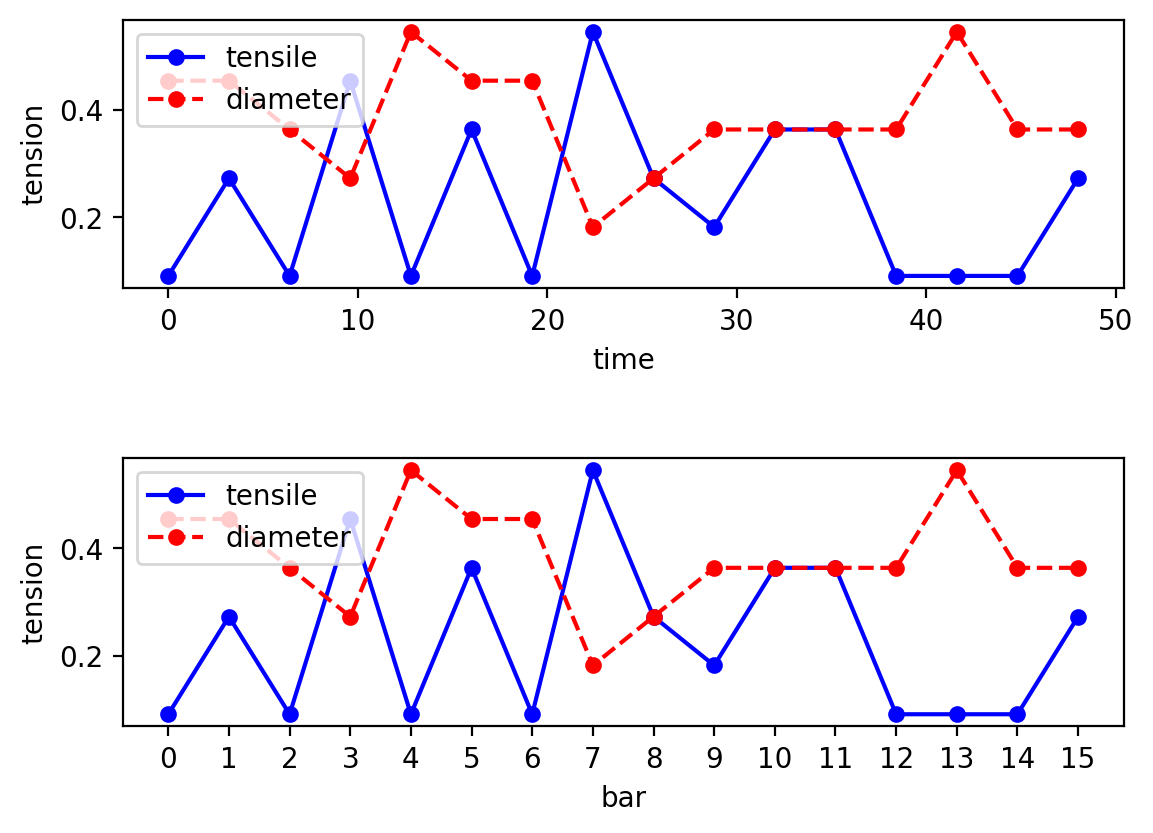

In [24]:

#@title the song control is:
## #@markdown The song key output in this cell can be inaccurate, please change the song key by the cell below if you find it wrong by listening to the original song

r = re.compile('i_\d')
programs = list(filter(r.match, event))
track_nums = len(programs)

density_poses = [-1 for i in range(track_nums)]
polyphony_poses = [-1 for i in range(track_nums)]
occupation_poses = [-1 for i in range(track_nums)]
program_poses = [-1 for i in range(track_nums)]


r = re.compile('d_\d')
densities = list(filter(r.match, event))
r = re.compile('y_\d')
polyphonies = list(filter(r.match, event))
r = re.compile('o_\d')
occupations = list(filter(r.match, event))




for t_num in range(track_nums):
    if t_num == 0:
        density_poses[t_num] = np.where(densities[t_num] == np.array(event))[0][0]
        occupation_poses[t_num] = np.where(occupations[t_num] == np.array(event))[0][0]
        polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(event))[0][0]
        program_poses[t_num] = np.where(programs[t_num] == np.array(event))[0][0]

    else:
        density_poses[t_num] = np.where(densities[t_num] == np.array(event[density_poses[t_num-1]+1:]))[0][0] + density_poses[t_num-1] + 1
        occupation_poses[t_num] = np.where(occupations[t_num] == np.array(event[occupation_poses[t_num-1]+1:]))[0][0] + occupation_poses[t_num-1] + 1
        polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(event[polyphony_poses[t_num-1]+1:]))[0][0] + polyphony_poses[t_num-1] + 1
        program_poses[t_num] = np.where(programs[t_num] == np.array(event[program_poses[t_num-1]+1:]))[0][0] + program_poses[t_num-1] + 1
tensile_poses = []
for i,token in enumerate(event):
    if token[:2] == 's_':
        tensile_poses.append(i)

diameter_poses = []
for i,token in enumerate(event):
    if token[:2] == 'a_':
        diameter_poses.append(i)


print('file control is:')
print(f'the time signature is {event[0]}')
print(f'the tempo level is {event[1][2]}')
print(f'the key is {all_key_names[int(event[2][2:])]}')

for i in range(track_nums):
    print(f'track {i} program number is {int(programs[i][2:])} {pretty_midi.program_to_instrument_name(int(programs[i][2:]))}')
    print(f'track {i} density is {densities[i][2:]}')
    print(f'track {i} occupation is {occupations[i][2:]}')
    print(f'track {i} polyphony is {polyphonies[i][2:]}')

draw_tension(event)

print('--------------------------')







In [ ]:
#@title Download the original midi

files.download(f'original_{song_number}_batch_{batch_number}.mid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
#@title Select control parameters to change the song feature
#@markdown The control displayed here will only work if you select the "change" to "True".If not they are just random controls not related to the selected song.

#@markdown If all change is set to False, it will show the current control


#@markdown To change a control, set it 'True' first then select a value to change.
##@markdown If song key/tempo/metre is changed, then whole song will be generated from scratch.
#@markdown If a track control is changed, the corresponding track will be generated again.
#@markdown If a bar control is changed, the corresponding bar will be generated again.
#@markdown For good result, just change track control in one track

#@markdown If change bar control, do not change song/track control at same time
#@title the selected song control is:

# r = re.compile('d_\d')
# densities = list(filter(r.match, event))
# r = re.compile('y_\d')
# polyphonies = list(filter(r.match, event))
# r = re.compile('o_\d')
# occupations = list(filter(r.match, event))




last_version = copy.deepcopy(event)


change_song_key = "False"
change_song_tempo = "False"
change_song_metre = "False"
change_track_0_program = "False"
change_track_1_program = "False"
change_track_2_program = "False"
# change_song_key = "False"  #@param ["True","False"]
# song_key = 'D major'  #@param ['C major', 'G major', 'D major', 'A major','E major', 'B major', 'F major', 'B- major','E- major', 'A- major', 'D- major', 'G- major','A minor', 'E minor', 'B minor', 'F# minor','C# minor', 'G# minor', 'D minor', 'G minor','C minor', 'F minor', 'B- minor', 'E- minor']


# change_song_tempo = "False"  #@param ["True","False"]
# song_tempo = 6 #@param {type: "slider", min: 0, max: 7}

# change_song_metre = "False"  #@param ["True","False"]
# song_metre = '6/8' #@param ['4/4', '3/4', '2/4', '6/8']

# change_track_0_program = "False"  #@param ["True","False"]
# track_0_program = '74' #@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]

# change_track_1_program = "False"  #@param ["True","False"]
# track_1_program = '3' #@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]

# change_track_2_program = "False"  #@param ["True","False"]
# track_2_program = '8' #@param [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127]

change_track_0_density = "False"  #@param ["True","False"]
track_0_density = 7  #@param {type: "slider", min: 0, max: 9}
change_track_0_occupation = "False"  #@param ["True","False"]
track_0_occupation = 3  #@param {type: "slider", min: 0, max: 9}
change_track_0_polyphony = "False"  #@param ["True","False"]
track_0_polyphony = 6  #@param {type: "slider", min: 0, max: 9}

change_track_1_density = "False"  #@param ["True","False"]
track_1_density = 4  #@param {type: "slider", min: 0, max: 9}
change_track_1_occupation = "False"  #@param ["True","False"]
track_1_occupation = 1  #@param {type: "slider", min: 0, max: 9}
change_track_1_polyphony = "False"  #@param ["True","False"]
track_1_polyphony = 6  #@param {type: "slider", min: 0, max: 9}

change_track_2_density = "False"  #@param ["True","False"]
track_2_density = 1  #@param {type: "slider", min: 0, max: 9}
change_track_2_occupation = "False"  #@param ["True","False"]
track_2_occupation = 7  #@param {type: "slider", min: 0, max: 9}
change_track_2_polyphony = "False"  #@param ["True","False"]
track_2_polyphony = 2  #@param {type: "slider", min: 0, max: 9}


change_bar_diameter = "True"  #@param ["True","False"]

change_diameter_bar_number =  0#@param {type:"integer"}
set_bar_diameter = 10  #@param {type: "slider", min: 0, max: 11}

change_bar_tensile = "False"  #@param ["True","False"]

change_tensile_bar_number =  11#@param {type:"integer"}
set_bar_tensile = 9  #@param {type: "slider", min: 0, max: 11}
# recalculate_tension = "False"  #@param ["True","False"]



if change_song_tempo == "True":
    print(f'change song tempo from {event[1][2]} to {song_tempo}')
    event[1] = 't_' + str(song_tempo)
if change_song_key == "True":
    print(f'change song key from {all_key_names[int(event[2][2:])]} to {song_key}')
    event[2] = key_to_token[song_key]


r = re.compile('i_\d')
programs = list(filter(r.match, event))
track_nums = len(programs)

density_poses = [-1 for i in range(track_nums)]
polyphony_poses = [-1 for i in range(track_nums)]
occupation_poses = [-1 for i in range(track_nums)]
program_poses = [-1 for i in range(track_nums)]


r = re.compile('d_\d')
densities = list(filter(r.match, event))
r = re.compile('y_\d')
polyphonies = list(filter(r.match, event))
r = re.compile('o_\d')
occupations = list(filter(r.match, event))




for t_num in range(track_nums):
    if t_num == 0:
        density_poses[t_num] = np.where(densities[t_num] == np.array(event))[0][0]
        occupation_poses[t_num] = np.where(occupations[t_num] == np.array(event))[0][0]
        polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(event))[0][0]
        program_poses[t_num] = np.where(programs[t_num] == np.array(event))[0][0]

    else:
        density_poses[t_num] = np.where(densities[t_num] == np.array(event[density_poses[t_num-1]+1:]))[0][0] + density_poses[t_num-1] + 1
        occupation_poses[t_num] = np.where(occupations[t_num] == np.array(event[occupation_poses[t_num-1]+1:]))[0][0] + occupation_poses[t_num-1] + 1
        polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(event[polyphony_poses[t_num-1]+1:]))[0][0] + polyphony_poses[t_num-1] + 1
        program_poses[t_num] = np.where(programs[t_num] == np.array(event[program_poses[t_num-1]+1:]))[0][0] + program_poses[t_num-1] + 1
tensile_poses = []
for i,token in enumerate(event):
    if token[:2] == 's_':
        tensile_poses.append(i)

diameter_poses = []
for i,token in enumerate(event):
    if token[:2] == 'a_':
        diameter_poses.append(i)


for i in range(track_nums):
    if i == 0:
        if change_track_0_program == 'True':
            event[program_poses[i]] = 'i_' + track_0_program
            print(f'change track {i} program from {int(programs[i][2:])} to {track_0_program}')

        if change_track_0_density == 'True':
            event[density_poses[i]] = 'd_' + str(track_0_density)
            print(f'change track {i} density from {int(densities[i][2:])} to {track_0_density}')

        if change_track_0_occupation == 'True':
            event[occupation_poses[i]] = 'o_' + str(track_0_occupation)
            print(f'change track {i} occupation from {int(occupations[i][2:])} to {track_0_occupation}')


        if change_track_0_polyphony == 'True':
            event[polyphony_poses[i]] = 'y_' + str(track_0_polyphony)
            print(f'change track {i} polyphony from {int(polyphonies[i][2:])} to {track_0_polyphony}')



    if i == 1:
        if change_track_1_program == 'True':
            event[program_poses[i]] = 'i_' + track_1_program
            print(f'change track {i} program from {int(programs[i][2:])} to {track_1_program}')

        if change_track_1_density == 'True':
            event[density_poses[i]] = 'd_' + str(track_1_density)
            print(f'change track {i} density from {int(densities[i][2:])} to {track_1_density}')

        if change_track_1_occupation == 'True':
            event[occupation_poses[i]] = 'o_' + str(track_1_occupation)
            print(f'change track {i} occupation from {int(occupations[i][2:])} to {track_1_occupation}')


        if change_track_1_polyphony == 'True':
            event[polyphony_poses[i]] = 'y_' + str(track_1_polyphony)
            print(f'change track {i} polyphony from {int(polyphonies[i][2:])} to {track_1_polyphony}')


    if i == 2:
        if change_track_2_program == 'True':
            event[program_poses[i]] = 'i_' + track_2_program
            print(f'change track {i} program from {int(programs[i][2:])} to {track_2_program}')

        if change_track_2_density == 'True':
            event[density_poses[i]] = 'd_' + str(track_2_density)
            print(f'change track {i} density from {int(densities[i][2:])} to {track_2_density}')

        if change_track_2_occupation == 'True':
            event[occupation_poses[i]] = 'o_' + str(track_2_occupation)
            print(f'change track {i} occupation from {int(occupations[i][2:])} to {track_2_occupation}')

        if change_track_2_polyphony == 'True':
            event[polyphony_poses[i]] = 'y_' + str(track_2_polyphony)
            print(f'change track {i} polyphony from {int(polyphonies[i][2:])} to {track_2_polyphony}')


# if recalculate_tension == 'True' or change_song_key == 'True':
#     pm = remi_2midi(event)
#     tensile_category, diameter_category,key_name = cal_tension(pm,song_key)
#     common_length = min(len(tensile_category),len(diameter_category),len(tensile_poses))
#     for i in range(common_length):
#         event[tensile_poses[i]] = 's_' + str(tensile_category[i])
#         event[diameter_poses[i]] = 'a_' + str(diameter_category[i])

if change_bar_diameter == 'True':

    if len(diameter_poses) > change_diameter_bar_number:
        print(f'change bar {change_diameter_bar_number} diameter from {event[diameter_poses[change_diameter_bar_number]][2:]} to {set_bar_diameter}')

        event[diameter_poses[change_diameter_bar_number]] = 'a_' + str(set_bar_diameter)

if change_bar_tensile == 'True':
    if len(tensile_poses) > change_tensile_bar_number:
        print(f'change bar {change_tensile_bar_number} tensile from {event[tensile_poses[change_tensile_bar_number]][2:]} to {set_bar_tensile}')

        event[tensile_poses[change_tensile_bar_number]] = 's_' + str(set_bar_tensile)

if change_song_metre == "True":
    print(f'change song metre from {event[0]} to {song_metre}')
    event[0] = song_metre

# draw_tension(event)


change bar 0 diameter from 5 to 10


In [ ]:
#@markdown Would you like to work on this new control of the song or go back to the previous control? If choose True it will go back to the last control version.

go_back_to_previous_control = "False"  #@param ["True","False"]
if go_back_to_previous_control == 'True':
    event = last_version
else:
    event = generated_tokens


## selected song modification

two basic modifications are:
1.   replace existing tracks with new tracks
2.   replace existing bars with new bars



In [26]:
#@title Run this to find out the track number and bar number in the original music
print(f'please input tracks_to_generate from 0 to {track_nums-1} or "all" tracks')
print(f'please input bars_to_generate from 0 to {len(bar_poses)-1} or "all" bars')


please input tracks_to_generate from 0 to 2 or "all" tracks
please input bars_to_generate from 0 to 15 or "all" bars


In [29]:
#@title Input tracks and bars to generate
#@markdown If input "all", generate all bars or tracks repectively

#@markdown e.g. if tracks_to_generate is "0" and bars_to_generate is "all", it will
#@markdown generate track 0(melody track) for all bars


#@markdown e.g. if bars_to_generate is "4,5,6" and trakcs_to_generate is "all", it will
#@markdown generate bar 4,5,6.


#@markdown if tracks_to_generate is "1,2" and bars_to_generate is "5,6,7,8", it will
#@markdown generate track 1 and track 2 (if the song has three tracks) in bar 5-8





tracks_to_generate = "1" #@param {type: "string"}
bars_to_generate = "all"  #@param {type: "string"}

generate_track_one_by_one = "False"  #@param {type: "string"}


track_control_match = "False" #@param ["True", "False"]
bar_control_match = "True" #@param ["True", "False"]
track_control_tolerance = 1 #@param {type:"slider", min:0, max:3, step:1}
bar_control_tolerance = 1 #@param {type:"slider", min:0, max:4, step:1}


#@markdown If track_control_match or bar_control_match is True, and the generation is for whole track(s) or whole bar(s), it will try to generate the music repeatedly until the generated music track/bar property match the control of that track/bar. To make it work for whole track, you can either: (1) select the track number to generate and set bar to "all". That is to generate the whole tracks or (2) select the bar number to generate, and set the track to "all". That is to generate the whole bars. The tolerance value of track/bar control can change the match criteria. If generate a whole track, the bar control will not be tracked.

generated_tokens = copy.deepcopy(event)
track_control_match = True if track_control_match == 'True' else False
bar_control_match = True if bar_control_match == 'True' else False
best_result_diff = 100
best_result = []

# iterate through all tracks one by one
if tracks_to_generate == 'all' and  bars_to_generate == 'all':
    tracks_to_generate = list(range(track_nums))
    bars_to_generate = list(range(len(bar_poses)))

    if generate_track_one_by_one == 'True':

        for one_track in tracks_to_generate:
            print(f'generate track {one_track}')

            result = generation_all(model, generated_tokens, device, vocab, 1,mask_tracks=[one_track],mask_bars=bars_to_generate)
            if result is None:
                print('generation failed, please generate again')

            else:
                generated_tokens, _,mask_track_names, mask_bar_names = result

            if track_control_match:

                generated_pm = remi_2midi(generated_tokens.tolist())
                generated_track_controls = cal_track_control(generated_tokens,
                                                            generated_pm)
                # print(generated_track_controls)
                # tension_result = cal_tension(generated_pm)
                # if tension_result:
                #     generated_tensile, generated_diameter, generated_key = tension_result
                # generated_bar_controls = []
                # for i in range(len(generated_tensile)):
                #     generated_bar_controls.append((generated_tensile[i],generated_diameter[i]))

                regenerated_tracks,diffs = check_controls(event,generated_track_controls,None,[one_track],None,track_control_tolerance,None)
                regenerated_times = 0


                while len(regenerated_tracks) > 0 and regenerated_times < 10:
                    print(diffs)
                    if diffs < best_result_diff:
                        best_result = copy.deepcopy(generated_tokens)
                        best_result_diff = diffs
                    print(f'regenerate track {regenerated_tracks}, the {regenerated_times} times')
                    result = generation_all(model, generated_tokens.tolist(), device, vocab, 1,mask_tracks=[one_track],mask_bars=bars_to_generate)
                    if result is None:
                        print('generation failed, please generate again')
                    else:
                        generated_tokens, _,mask_track_names, mask_bar_names = result


                    generated_pm = remi_2midi(generated_tokens.tolist())
                    generated_track_controls = cal_track_control(generated_tokens,
                                                                generated_pm)
                    # print(generated_track_controls)
                    regenerated_tracks,diffs = check_controls(event,generated_track_controls,None,[one_track],None,track_control_tolerance,None)
                    regenerated_times += 1
                print(diffs)
                if diffs < best_result_diff:
                    best_result = copy.deepcopy(generated_tokens)
                    best_result_diff = diffs
                if regenerated_times == 10:
                    print(f'cannot match all the track control for track {one_track}, please increase track control tolerance')
                else:
                    print(f'track {one_track} control matched within track control tolerance')

    else:

        result = generation_all(model, generated_tokens, device, vocab, 1,mask_tracks=tracks_to_generate,mask_bars=bars_to_generate)
        if result is None:
            print('generation failed, please generate again')

        else:
            generated_tokens, _,mask_track_names, mask_bar_names = result

        if track_control_match:

            generated_pm = remi_2midi(generated_tokens.tolist())
            generated_track_controls = cal_track_control(generated_tokens,
                                                        generated_pm)
            # print(generated_track_controls)
                # tension_result = cal_tension(generated_pm)
                # if tension_result:
                #     generated_tensile, generated_diameter, generated_key = tension_result
                # generated_bar_controls = []
                # for i in range(len(generated_tensile)):
                #     generated_bar_controls.append((generated_tensile[i],generated_diameter[i]))

            regenerated_tracks,diffs = check_controls(event,generated_track_controls,None,tracks_to_generate,None,track_control_tolerance,None)
            regenerated_times = 0


            while len(regenerated_tracks) > 0 and regenerated_times < 10:
                print(diffs)
                if diffs < best_result_diff:
                    best_result = copy.deepcopy(generated_tokens)
                    best_result_diff = diffs
                print(f'regenerate track {regenerated_tracks}, the {regenerated_times} times')
                result = generation_all(model, generated_tokens.tolist(), device, vocab, 1,mask_tracks=regenerated_tracks,mask_bars=bars_to_generate)
                if result is None:
                    print('generation failed, please generate again')
                else:
                    generated_tokens, _,mask_track_names, mask_bar_names = result


                generated_pm = remi_2midi(generated_tokens.tolist())
                generated_track_controls = cal_track_control(generated_tokens,
                                                            generated_pm)
                # print(generated_track_controls)
                regenerated_tracks,diffs = check_controls(event,generated_track_controls,None,regenerated_tracks,None,track_control_tolerance,None)

                regenerated_times += 1

            print(diffs)
            if diffs < best_result_diff:
                best_result_diff = diffs
                best_result = copy.deepcopy(generated_tokens)
            if regenerated_times == 10:
                print(f'cannot match all the track control for track {one_track}, please increase track control tolerance')
            else:
                print(f'track control matched within track control tolerance')


elif  tracks_to_generate == 'all' and  bars_to_generate != 'all':
    tracks_to_generate = list(range(track_nums))
    bars_to_generate = [int(item) for item in bars_to_generate.split(',')]



    result = generation_all(model, generated_tokens, device, vocab, 2,mask_tracks=tracks_to_generate,mask_bars=bars_to_generate)
    if result is None:
        print('generation failed, please generate again')

    else:
        generated_tokens, _,mask_track_names, mask_bar_names = result


    if bar_control_match:
        generated_pm = remi_2midi(generated_tokens.tolist())

        tension_result = cal_tension(generated_pm,all_key_names[int(event[2][2:])])
        if tension_result:
            generated_tensile, generated_diameter, generated_key = tension_result
        generated_bar_controls = []
        for i in range(min(len(generated_tensile),16)):
            generated_bar_controls.append((generated_tensile[i],generated_diameter[i]))

        regenerated_bars,diffs = check_controls(event,None,generated_bar_controls,None,bars_to_generate,None,bar_control_tolerance)
        regenerated_times = 0

        while len(regenerated_bars) > 0 and regenerated_times < 10:

            print(f'generated times is {regenerated_times}')
            print(diffs)
            if diffs < best_result_diff:
                best_result = copy.deepcopy(generated_tokens)
                best_result_diff =  diffs

            result = generation_all(model, generated_tokens.tolist(), device, vocab, 2,mask_tracks=tracks_to_generate,mask_bars=regenerated_bars)
            if result is None:
                print('generation failed, please generate again')

            else:
                generated_tokens, _,mask_track_names, mask_bar_names = result

            generated_pm = remi_2midi(generated_tokens.tolist())

            tension_result = cal_tension(generated_pm,all_key_names[int(event[2][2:])])
            if tension_result:
                generated_tensile, generated_diameter, generated_key = tension_result
            generated_bar_controls = []
            for i in range(min(len(generated_tensile),16)):
                generated_bar_controls.append((generated_tensile[i],generated_diameter[i]))

            regenerated_bars,diffs = check_controls(event,None,generated_bar_controls,None,bars_to_generate,None,bar_control_tolerance)


            regenerated_times += 1
        print(diffs)
        if diffs < best_result_diff:
            best_result = copy.deepcopy(generated_tokens)
            best_result_diff =  diffs
        if regenerated_times == 10:
            print(f'cannot match all the bar control with threshold {bar_control_tolerance}, please increase bar control tolerance')
        else:
            print(f'all bar control matched within bar control tolerance')





elif  tracks_to_generate != 'all' and  bars_to_generate == 'all':
    tracks_to_generate = [int(item) for item in tracks_to_generate.split(',')]
    bars_to_generate = list(range(len(bar_poses)))




    for one_track in tracks_to_generate:

        result = generation_all(model, generated_tokens, device, vocab, 1,mask_tracks=[one_track],mask_bars=bars_to_generate)
        if result is None:
            print('generation failed, please generate again')

        else:
            generated_tokens, _,mask_track_names, mask_bar_names = result

        if track_control_match:

            generated_pm = remi_2midi(generated_tokens.tolist())
            generated_track_controls = cal_track_control(generated_tokens,
                                                        generated_pm)
            # print(generated_track_controls)

            regenerated_tracks,diffs = check_controls(event,generated_track_controls,None,[one_track],None,track_control_tolerance,None)
            regenerated_times = 0


            while len(regenerated_tracks) > 0 and regenerated_times < 10:
                print(diffs)
                if diffs < best_result_diff:
                    best_result = copy.deepcopy(generated_tokens)
                    best_result_diff = diffs
                    print('new best result')
                print(f'regenerate track {regenerated_tracks}, the {regenerated_times} times')

                result = generation_all(model, generated_tokens.tolist(), device, vocab, 1,mask_tracks=[one_track],mask_bars=bars_to_generate)
                if result is None:
                    print('generation failed, please generate again')
                else:
                    generated_tokens, _,mask_track_names, mask_bar_names = result


                generated_pm = remi_2midi(generated_tokens.tolist())
                generated_track_controls = cal_track_control(generated_tokens,
                                                            generated_pm)
                # print(generated_track_controls)
                regenerated_tracks,diffs = check_controls(event,generated_track_controls,None,[one_track],None,track_control_tolerance,None)

                regenerated_times += 1
            print(diffs)
            if diffs < best_result_diff:

                best_result = copy.deepcopy(generated_tokens)
                best_result_diff = diffs
                print('new best result')
            if regenerated_times == 10:
                print(f'cannot match all the track control for track {one_track} with threshold {track_control_tolerance}, please increase track control tolerance')
            else:
                print(f"track {one_track} control matched within track control tolerance")




else:
    print('not checking controls here without select an "all" in the track/bar generation')
    bars_to_generate = [int(item) for item in bars_to_generate.split(',')]
    tracks_to_generate = [int(item) for item in tracks_to_generate.split(',')]

    result = generation_all(model, event, device, vocab, 0,mask_tracks=tracks_to_generate,mask_bars=bars_to_generate)
    if result is None:
        print('generation failed, please generate again')

    else:
        generated_tokens, _,mask_track_names, mask_bar_names = result

if len(best_result) > 0:
    generated_tokens = best_result
    print(best_result_diff)




In [ ]:
#@title play the generated song
generated_pm.write(f'generated_{song_number}_batch_{batch_number}.mid')
IPython.display.Audio(generated_pm.fluidsynth(fs=16000,sf2_path='font.sf2'), rate=16000)


In [ ]:
#@markdown To work on the newly generated version of the song for another round of generation,  please set the option to False and run this cell.

go_back_to_previous = "True"  #@param ["True","False"]
if go_back_to_previous == 'True':
    event = last_version
    print('use the previous version as the start of generation')

else:
    event = generated_tokens.tolist()

    generated_pm = remi_2midi(generated_tokens.tolist())

    generated_track_controls = cal_track_control(generated_tokens,
                                                 generated_pm)




    r = re.compile('d_\d')
    densities = list(filter(r.match, event))
    r = re.compile('y_\d')
    polyphonies = list(filter(r.match, event))
    r = re.compile('o_\d')
    occupations = list(filter(r.match, event))




    for t_num in range(track_nums):
        if t_num == 0:
            density_poses[t_num] = np.where(densities[t_num] == np.array(event))[0][0]
            occupation_poses[t_num] = np.where(occupations[t_num] == np.array(event))[0][0]
            polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(event))[0][0]
            program_poses[t_num] = np.where(programs[t_num] == np.array(event))[0][0]
            event[density_poses[t_num]] = 'd_' + str(generated_track_controls[t_num][0])
            event[occupation_poses[t_num]] = 'o_' + str(generated_track_controls[t_num][1])
            event[polyphony_poses[t_num]] = 'y_' + str(generated_track_controls[t_num][2])

        else:
            density_poses[t_num] = np.where(densities[t_num] == np.array(event[density_poses[t_num-1]+1:]))[0][0] + density_poses[t_num-1] + 1
            occupation_poses[t_num] = np.where(occupations[t_num] == np.array(event[occupation_poses[t_num-1]+1:]))[0][0] + occupation_poses[t_num-1] + 1
            polyphony_poses[t_num] = np.where(polyphonies[t_num] == np.array(event[polyphony_poses[t_num-1]+1:]))[0][0] + polyphony_poses[t_num-1] + 1
            program_poses[t_num] = np.where(programs[t_num] == np.array(event[program_poses[t_num-1]+1:]))[0][0] + program_poses[t_num-1] + 1

            event[density_poses[t_num]] = 'd_' + str(generated_track_controls[t_num][0])
            event[occupation_poses[t_num]] = 'o_' + str(generated_track_controls[t_num][1])
            event[polyphony_poses[t_num]] = 'y_' + str(generated_track_controls[t_num][2])

    tensile_poses = []
    for i,token in enumerate(event):
        if token[:2] == 's_':
            tensile_poses.append(i)


    diameter_poses = []
    for i,token in enumerate(event):
        if token[:2] == 'a_':
            diameter_poses.append(i)

    tension_result = cal_tension(generated_pm,all_key_names[int(event[2][2:])])
    if tension_result:
        generated_tensile, generated_diameter, generated_key = tension_result
        generated_bar_controls = []
        for i in range(min(len(generated_tensile),16)):
            generated_bar_controls.append((generated_tensile[i],generated_diameter[i]))


        for i,pos in enumerate(tensile_poses):
            event[pos] = 's_' + str(generated_bar_controls[i][0])
            event[pos+1] = 'a_' + str(generated_bar_controls[i][1])







    print(f'generated track controls is {generated_track_controls}')

    last_version = copy.deepcopy(event)
    print('use the newly generated version as the start of generation')



generated track controls is [(2, 7, 0), (1, 8, 0), (3, 8, 9)]
use the newly generated version as the start of generation


In [ ]:
#@title Download the generated midi

files.download(f'generated_{song_number}_batch_{batch_number}.mid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

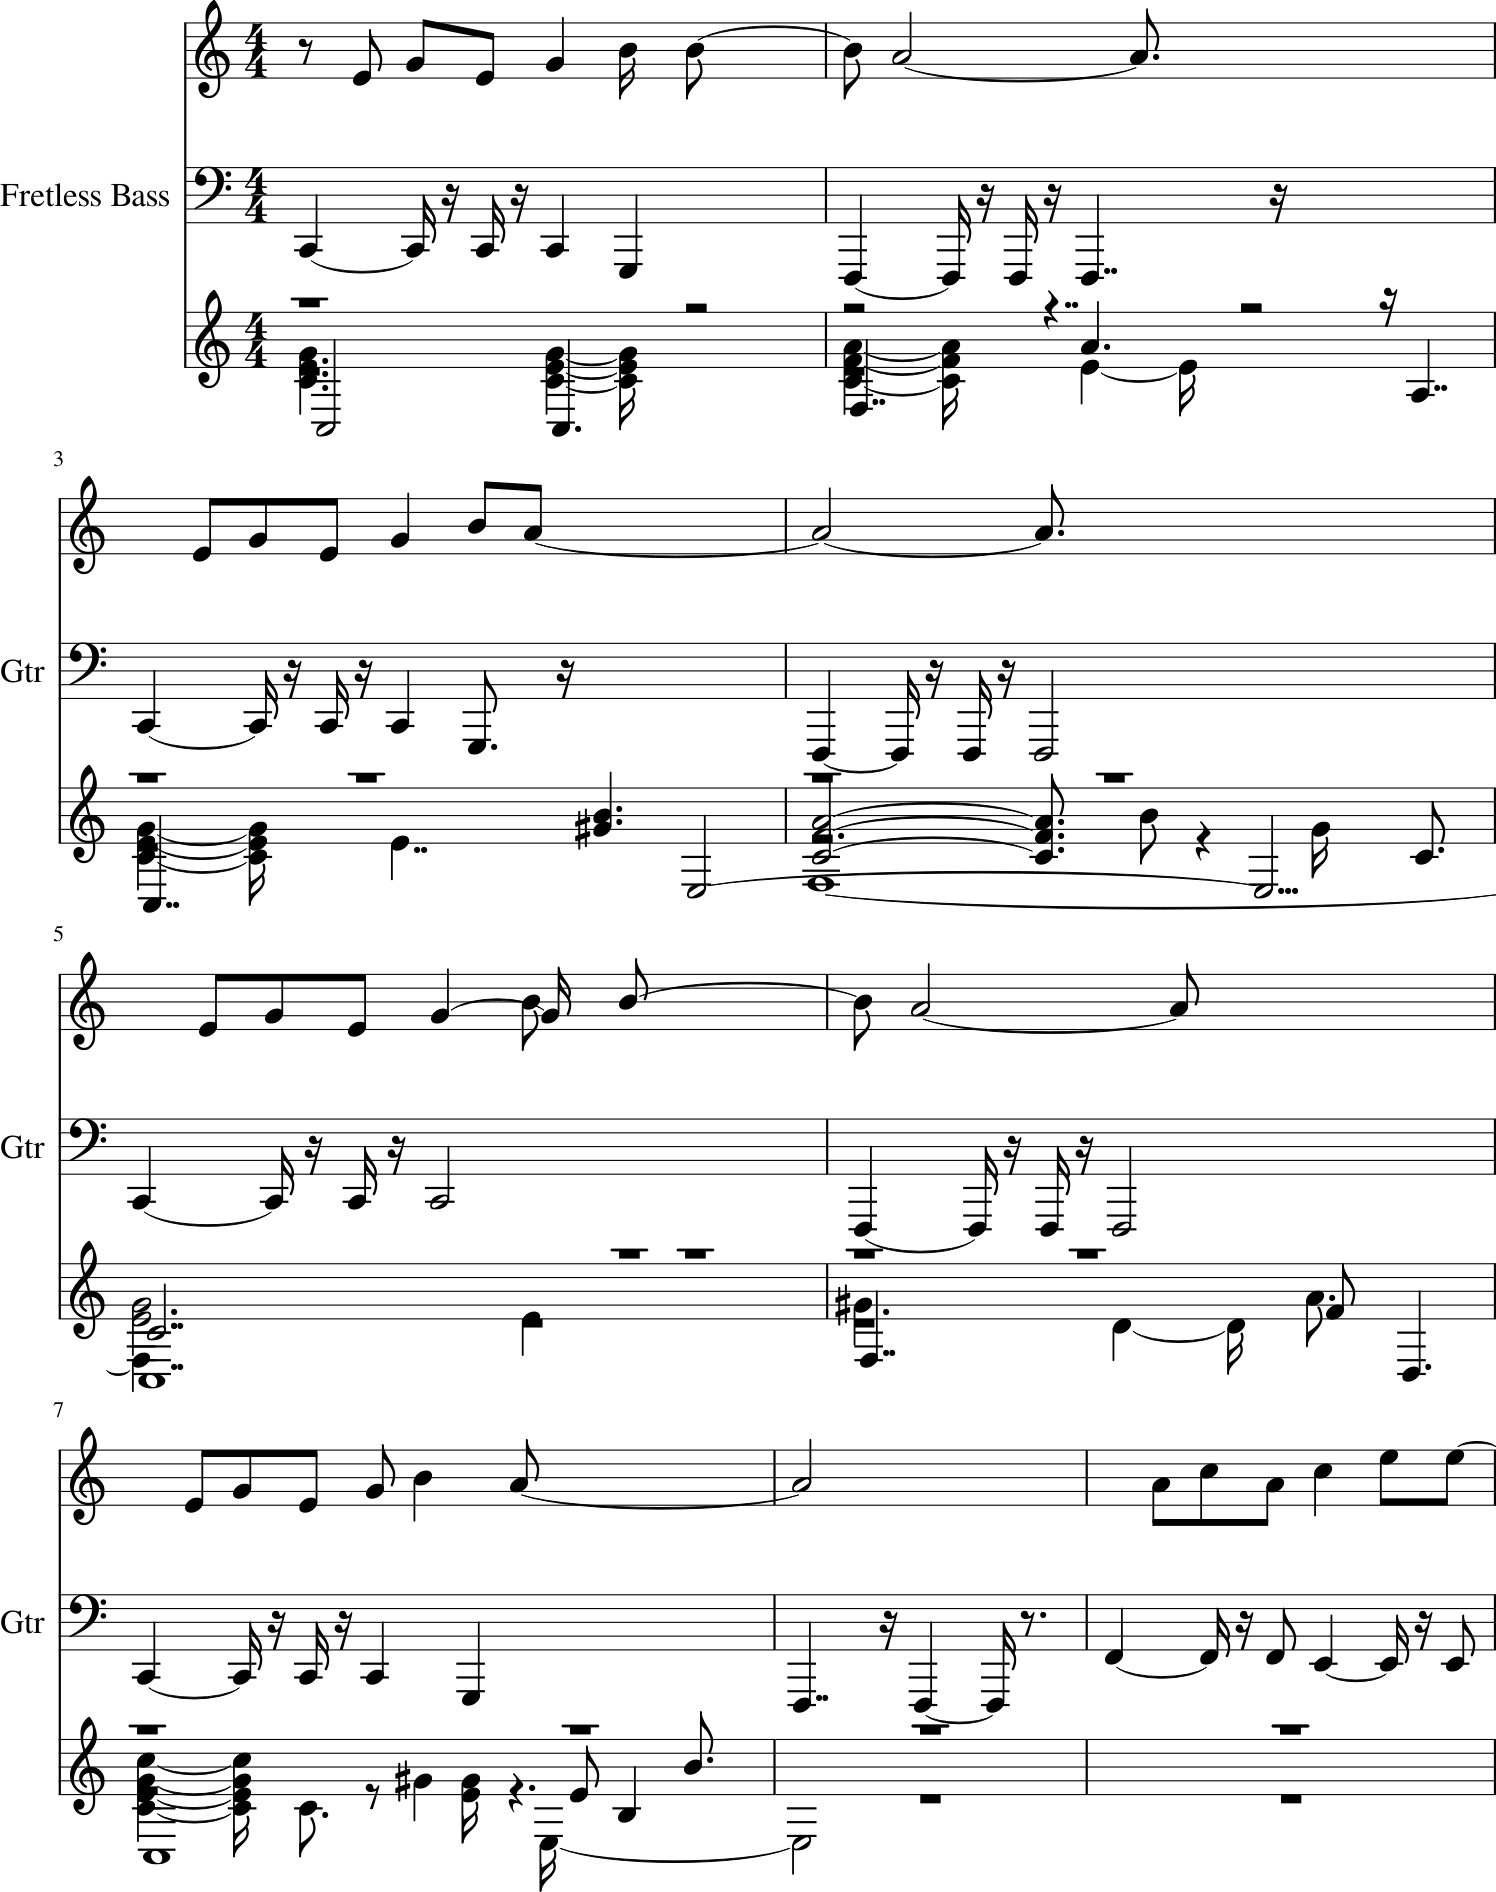

In [ ]:
#@title show the score
show_score(generated_pm)

Then you can modify another track/bar iteratively, just do the operations above again, or choose some control parameters to change
